In [1]:
import csv, sys
import numpy as np
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

from konlpy.tag import Okt
okt = Okt()

In [2]:
openFileName = '전자담배 중독_954_naver_blog.txt'
    
f = open(openFileName, 'r', encoding='utf-8')
data = f.read()
f.close()

In [3]:
data=data.replace('\n','')
for i in range(1,944):
    x="naver_blog_"+str(i)
    data=data.replace(x,"\n\n"+x+"  "+"\n")
f = open('전자담배중독_블로그_크롤링1', 'w', encoding='utf-8')
f.write(data)
print(data)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [4]:
openFileName = '전자담배중독_블로그_크롤링1'
    
f = open(openFileName, 'r', encoding='utf-8')
result = f.read()
f.close()

In [5]:
def tokenizer(raw, pos=["Noun"], stopword=[]): # 다른 품사 추가 원할 시 pos=["Noun", "Josa", ...]
    return [
        word for word, tag in okt.pos(
            raw, 
            norm=True,   # normalize 그랰ㅋㅋ -> 그래ㅋㅋ
            stem=True    # stemming 바뀌나->바뀌다
            )
            if len(word) > 1 and tag in pos and word not in stopword
        ]

data = tokenizer(result)

In [6]:
vectorize = CountVectorizer()
X = vectorize.fit_transform(data)

In [7]:
print(X)

  (0, 7274)	1
  (1, 6288)	1
  (2, 10283)	1
  (3, 3485)	1
  (4, 13806)	1
  (5, 5757)	1
  (6, 5823)	1
  (7, 5811)	1
  (8, 3649)	1
  (9, 13367)	1
  (10, 11643)	1
  (11, 5757)	1
  (12, 10545)	1
  (13, 600)	1
  (14, 6288)	1
  (15, 10738)	1
  (16, 7274)	1
  (17, 10964)	1
  (18, 5811)	1
  (19, 10571)	1
  (20, 104)	1
  (21, 13806)	1
  (22, 1177)	1
  (23, 1604)	1
  (24, 5258)	1
  :	:
  (225414, 1242)	1
  (225415, 5260)	1
  (225416, 6206)	1
  (225417, 10283)	1
  (225418, 4042)	1
  (225419, 6781)	1
  (225420, 10250)	1
  (225421, 6206)	1
  (225422, 10283)	1
  (225423, 1692)	1
  (225424, 5260)	1
  (225425, 7066)	1
  (225426, 5260)	1
  (225427, 6206)	1
  (225428, 4042)	1
  (225429, 6781)	1
  (225430, 10250)	1
  (225431, 6206)	1
  (225432, 10283)	1
  (225433, 1692)	1
  (225434, 158)	1
  (225435, 12247)	1
  (225436, 4526)	1
  (225437, 7167)	1
  (225438, 18)	1


In [8]:
print(vectorize.vocabulary_)

{'신랑': 7274, '선물': 6288, '전자담배': 10283, '리뷰': 3485, '회사': 13806, '사람': 5757, '사이': 5823, '사용': 5811, '마침': 3649, '해외': 13367, '출장': 11643, '제이': 10545, '결혼': 600, '주기도': 10738, '지금': 10964, '제품': 10571, '가장': 104, '구입': 1177, '기존': 1604, '부분': 5258, '쪼끔': 11201, '회색': 13808, '은색': 9222, '업그레이드': 8084, '우리나라': 8840, '정식': 10443, '판매': 12575, '구매': 1144, '대행': 2649, '기계': 1512, '국내': 1211, '유통': 9162, '금지': 1486, '미국': 4340, '시장': 7175, '점유': 10362, '신생': 7291, '워낙': 8909, '청소년': 11437, '보호': 5135, '위해': 9054, '인터넷': 9646, '성인': 6404, '인증': 9629, '망고': 3785, '그것': 1338, '인기': 9578, '여러': 8217, '규제': 1330, '생기': 6124, '택배': 12237, '포함': 12828, '오만': 8534, '원대': 8924, '쓰기': 7491, '때문': 3158, '니코틴': 2273, '함량': 13277, '제조': 10558, '다른': 2304, '전담': 10229, '액체': 7855, '가열': 86, '수증기': 6795, '차별': 11244, '강점': 316, '크기': 12051, '손가락': 6614, '휴대': 13909, '충전': 11661, '연결': 8302, '설명': 6344, '그냥': 1342, '생각': 6118, '지도': 10979, '만큼': 3724, '작고': 9957, '혹시': 13646, '사진': 5851, '내용': 2008, '배터리':

In [9]:
print(X.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [10]:
tfidf = TfidfTransformer(use_idf=True, norm='l2', smooth_idf=True)
print(tfidf.fit_transform(vectorize.fit_transform(data)).toarray())

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [11]:
freqs = [(word, X.getcol(idx).sum()) for word, idx in vectorize.vocabulary_.items()]
dict(freqs)

{'신랑': 93,
 '선물': 208,
 '전자담배': 10718,
 '리뷰': 96,
 '회사': 311,
 '사람': 1112,
 '사이': 121,
 '사용': 2673,
 '마침': 11,
 '해외': 116,
 '출장': 8,
 '제이': 7,
 '결혼': 28,
 '주기도': 11,
 '지금': 428,
 '제품': 1866,
 '가장': 600,
 '구입': 594,
 '기존': 364,
 '부분': 517,
 '쪼끔': 2,
 '회색': 4,
 '은색': 19,
 '업그레이드': 25,
 '우리나라': 123,
 '정식': 21,
 '판매': 614,
 '구매': 805,
 '대행': 3,
 '기계': 182,
 '국내': 246,
 '유통': 100,
 '금지': 129,
 '미국': 362,
 '시장': 187,
 '점유': 38,
 '신생': 5,
 '워낙': 55,
 '청소년': 358,
 '보호': 50,
 '위해': 637,
 '인터넷': 167,
 '성인': 112,
 '인증': 84,
 '망고': 117,
 '그것': 197,
 '인기': 336,
 '여러': 169,
 '규제': 207,
 '생기': 36,
 '택배': 61,
 '포함': 355,
 '오만': 4,
 '원대': 8,
 '쓰기': 23,
 '때문': 1335,
 '니코틴': 3221,
 '함량': 171,
 '제조': 120,
 '다른': 596,
 '전담': 365,
 '액체': 96,
 '가열': 195,
 '수증기': 129,
 '차별': 15,
 '강점': 9,
 '크기': 118,
 '손가락': 27,
 '휴대': 126,
 '충전': 612,
 '연결': 55,
 '설명': 381,
 '그냥': 391,
 '생각': 1567,
 '지도': 89,
 '만큼': 130,
 '작고': 31,
 '혹시': 94,
 '사진': 271,
 '내용': 277,
 '배터리': 565,
 '초록색': 8,
 '불로': 9,
 '확인': 270,
 '기기': 900,
 

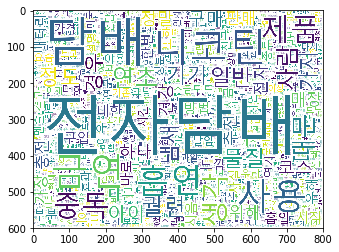

In [12]:
from wordcloud import WordCloud

w=WordCloud(font_path = 'C:\\windows\\Fonts\\malgun.ttf', width=800,height=600,mode='RGBA',background_color='white',max_words=2000).fit_words(dict(freqs))

import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(w)
#plt.axis(&quot;off&quot;)
plt.show()

In [13]:
vectorizeT = TfidfVectorizer()

Y = vectorizeT.fit_transform(data)

print(vectorize.vocabulary_) # 단어집의 콘텐츠를 나타낸다. value값은 인덱스를 나타낸다.
print(Y.toarray()) # 단어집에 있는 단어들의 각각의 카운트 갯수를 나타낸다.

{'신랑': 7274, '선물': 6288, '전자담배': 10283, '리뷰': 3485, '회사': 13806, '사람': 5757, '사이': 5823, '사용': 5811, '마침': 3649, '해외': 13367, '출장': 11643, '제이': 10545, '결혼': 600, '주기도': 10738, '지금': 10964, '제품': 10571, '가장': 104, '구입': 1177, '기존': 1604, '부분': 5258, '쪼끔': 11201, '회색': 13808, '은색': 9222, '업그레이드': 8084, '우리나라': 8840, '정식': 10443, '판매': 12575, '구매': 1144, '대행': 2649, '기계': 1512, '국내': 1211, '유통': 9162, '금지': 1486, '미국': 4340, '시장': 7175, '점유': 10362, '신생': 7291, '워낙': 8909, '청소년': 11437, '보호': 5135, '위해': 9054, '인터넷': 9646, '성인': 6404, '인증': 9629, '망고': 3785, '그것': 1338, '인기': 9578, '여러': 8217, '규제': 1330, '생기': 6124, '택배': 12237, '포함': 12828, '오만': 8534, '원대': 8924, '쓰기': 7491, '때문': 3158, '니코틴': 2273, '함량': 13277, '제조': 10558, '다른': 2304, '전담': 10229, '액체': 7855, '가열': 86, '수증기': 6795, '차별': 11244, '강점': 316, '크기': 12051, '손가락': 6614, '휴대': 13909, '충전': 11661, '연결': 8302, '설명': 6344, '그냥': 1342, '생각': 6118, '지도': 10979, '만큼': 3724, '작고': 9957, '혹시': 13646, '사진': 5851, '내용': 2008, '배터리':

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [23]:
import operator

freqs_TFIDF = [(word, Y.getcol(idx).sum()) for word, idx in vectorizeT.vocabulary_.items()]
dict_result = dict(freqs_TFIDF)

#일반적인 단어 빼기

stop_list=['금연', '선택', '요즘', '현재', '대한', '제품', '먼저', '물질', '유해', '언제', '느낌', '제일', '부분', '연초', '담배', '달리', '방법', '한번', '사용', '사실', '거의', '위해', '배터리', '만큼', '발표', '정도', '청소', '직접', '가장', '이번', '전자담배', '결과', '증상', '모두', '카트리지', '자체', '정말', '포함', '서면', '코일', '저희', '마음', '역시', '사진', '항상', '통해', '모든', '시작', '일반', '여기', '무엇', '중독', '이용', '하나', '동안', '모드', '방식', '차이', '여러분', '사람', '다른', '내용', '니코틴', '조금', '처음', '확인', '우리', '탱크', '등등', '이유', '하루', '아주', '약간', '효과', '매우', '점점', '계속', '진짜', '최근', '가지', '설명', '경우', '실제', '해도', '거나', '오늘', '거기', '다시', '기능', '완전', '때문', '또한', '오히려', '일단', '부산', '생각', '하카', '여러', '바로', '블랙', '전혀', '그냥', '하니', '친구', '지금', '뭔가', '시간', '보고', '이제', '궐련', '대해', '기존', '대신', '더욱', '소개', '흡연', '보통', '상이']
for i in stop_list:
    dict_result.pop(i)

# value(단어별 빈도수)를 기준으로 내림차순 정렬
# sort_result : 튜플을 항목으로 갖는 리스트
sort_result = sorted(dict_result.items(), reverse=True, key=operator.itemgetter(1))

for d in sort_result :
    print(d)

('기기', 900.0)
('냄새', 875.0)
('아이', 831.0)
('구매', 805.0)
('건강', 742.0)
('코스', 729.0)
('매장', 636.0)
('추천', 636.0)
('판매', 614.0)
('충전', 612.0)
('전자', 598.0)
('구입', 594.0)
('흡입', 522.0)
('연기', 486.0)
('가격', 449.0)
('종류', 438.0)
('발암', 424.0)
('멘솔', 423.0)
('성분', 409.0)
('시연', 384.0)
('연구', 374.0)
('그림', 367.0)
('전담', 365.0)
('미국', 362.0)
('과일', 359.0)
('청소년', 358.0)
('타르', 345.0)
('이상', 342.0)
('경고', 338.0)
('인기', 336.0)
('문제', 330.0)
('보조', 327.0)
('회사', 311.0)
('디자인', 309.0)
('위험', 303.0)
('발생', 288.0)
('용량', 288.0)
('출시', 276.0)
('호흡', 274.0)
('주변', 272.0)
('도움', 271.0)
('방문', 269.0)
('문구', 268.0)
('상태', 267.0)
('비교', 263.0)
('개인', 263.0)
('다음', 261.0)
('포스팅', 248.0)
('국내', 246.0)
('보기', 244.0)
('장점', 243.0)
('버튼', 242.0)
('충전기', 238.0)
('자신', 237.0)
('달달', 235.0)
('관련', 229.0)
('교체', 224.0)
('영향', 223.0)
('고민', 221.0)
('기분', 219.0)
('베이핑', 219.0)
('상형', 219.0)
('커피', 219.0)
('대부분', 213.0)
('정보', 213.0)
('조절', 213.0)
('스틱', 213.0)
('조사', 212.0)
('선물', 208.0)
('부작용', 208.0)
('규제', 207.0)

('부류', 11.0)
('다해', 11.0)
('아저씨', 11.0)
('적립', 11.0)
('구독', 11.0)
('화장', 11.0)
('계단', 11.0)
('핑크색', 11.0)
('타로', 11.0)
('개별', 11.0)
('지방', 11.0)
('여지', 11.0)
('페이스북', 11.0)
('휴무', 11.0)
('주점', 11.0)
('수파', 11.0)
('몸안', 11.0)
('성향', 11.0)
('포레', 11.0)
('밀리', 11.0)
('극복', 11.0)
('창원', 11.0)
('튀김', 11.0)
('증발', 11.0)
('올레', 11.0)
('도쿄', 11.0)
('오씨', 11.0)
('신계륜', 11.0)
('멤버십', 11.0)
('불꽃', 11.0)
('붕대', 11.0)
('아이러니', 10.0)
('가연성', 10.0)
('무코', 10.0)
('독극물', 10.0)
('기원', 10.0)
('대의', 10.0)
('실감', 10.0)
('열대과일', 10.0)
('크리', 10.0)
('얼음', 10.0)
('좌절', 10.0)
('통째', 10.0)
('번은', 10.0)
('점등', 10.0)
('금세', 10.0)
('문의사항', 10.0)
('오직', 10.0)
('기운', 10.0)
('마개', 10.0)
('아드레날린', 10.0)
('양으로', 10.0)
('모던', 10.0)
('폭발사고', 10.0)
('편리', 10.0)
('버지니아', 10.0)
('수령', 10.0)
('노원', 10.0)
('순서', 10.0)
('청소기', 10.0)
('능이', 10.0)
('지사', 10.0)
('선풍', 10.0)
('단연', 10.0)
('악화', 10.0)
('블랙캣', 10.0)
('고양이', 10.0)
('중지', 10.0)
('발송', 10.0)
('가중', 10.0)
('심장병', 10.0)
('대감', 10.0)
('디스플레이', 10.0)
('거짓', 10.0)
('캠핑', 10

('소시', 4.0)
('밀면', 4.0)
('박병주', 4.0)
('은폐', 4.0)
('비밀번호', 4.0)
('마곡역', 4.0)
('애니', 4.0)
('클라우디오', 4.0)
('연보', 4.0)
('용무', 4.0)
('우린', 4.0)
('꼬리', 4.0)
('와이티엔', 4.0)
('장애인', 4.0)
('해성', 4.0)
('한기', 4.0)
('푸르지오', 4.0)
('부총리', 4.0)
('소실', 4.0)
('퀴즈', 4.0)
('에쎄', 4.0)
('치기', 4.0)
('포항시', 4.0)
('경상북도', 4.0)
('효소', 4.0)
('거립니', 4.0)
('아델', 4.0)
('옥포', 4.0)
('안방', 4.0)
('이씨', 4.0)
('한천로', 4.0)
('수유동', 4.0)
('타워', 4.0)
('철썩', 4.0)
('유일', 4.0)
('삼만원', 4.0)
('브리티쉬', 4.0)
('증오', 4.0)
('스탠퍼드대', 4.0)
('코팅', 4.0)
('화요일', 4.0)
('트레디셔널', 4.0)
('입욕', 4.0)
('덕점', 4.0)
('도박중독', 4.0)
('관광지', 4.0)
('명문제약', 4.0)
('누렇', 4.0)
('하반', 4.0)
('수염', 4.0)
('부동', 4.0)
('샤베트', 4.0)
('카메라', 4.0)
('절벽', 4.0)
('스테이션', 4.0)
('후속', 4.0)
('상남점', 4.0)
('에듀', 4.0)
('우진', 4.0)
('도우', 4.0)
('무사', 4.0)
('인플루엔자', 4.0)
('미련', 4.0)
('항바이러스제', 4.0)
('실습', 4.0)
('양평', 4.0)
('오장육부', 4.0)
('홍군', 4.0)
('공자', 4.0)
('현판', 4.0)
('영광', 4.0)
('양초', 4.0)
('서재', 4.0)
('격전', 4.0)
('올림픽', 4.0)
('몹시', 4.0)
('틴틴', 4.0)
('대행', 3.0)
('원자', 3.0)
('인

('생방', 2.0)
('의주', 2.0)
('반기', 2.0)
('마이클', 2.0)
('메쉬', 2.0)
('상소', 2.0)
('구의동', 2.0)
('한다해', 2.0)
('싸이', 2.0)
('실리카', 2.0)
('팥맛액', 2.0)
('어우', 2.0)
('차려', 2.0)
('바오', 2.0)
('십이지장', 2.0)
('위궤양', 2.0)
('위염', 2.0)
('스테아르산', 2.0)
('서두', 2.0)
('오븐', 2.0)
('좌표', 2.0)
('모음', 2.0)
('이스트런던', 2.0)
('유니', 2.0)
('조지아', 2.0)
('주립대', 2.0)
('유사성', 2.0)
('실화', 2.0)
('비위', 2.0)
('적절', 2.0)
('모험', 2.0)
('입호읍', 2.0)
('조회', 2.0)
('국도', 2.0)
('블렌드', 2.0)
('반짝', 2.0)
('셀링', 2.0)
('소아', 2.0)
('당초', 2.0)
('것일', 2.0)
('초고', 2.0)
('대사물질', 2.0)
('기술제휴', 2.0)
('케잌', 2.0)
('이색', 2.0)
('외신', 2.0)
('몰리', 2.0)
('파생', 2.0)
('선도', 2.0)
('주간지', 2.0)
('타박', 2.0)
('하야', 2.0)
('쵝오', 2.0)
('박람회', 2.0)
('빠빠이', 2.0)
('당췌', 2.0)
('신현준', 2.0)
('도표', 2.0)
('광장', 2.0)
('입담배', 2.0)
('염기성', 2.0)
('힙합', 2.0)
('양담배', 2.0)
('역설', 2.0)
('만회', 2.0)
('완연', 2.0)
('부회장', 2.0)
('거점', 2.0)
('개설', 2.0)
('파라독스', 2.0)
('맥스', 2.0)
('오랜지', 2.0)
('전력량', 2.0)
('에두', 2.0)
('선태을', 2.0)
('이모티콘', 2.0)
('쏙쏙', 2.0)
('후생성', 2.0)
('국판', 2.0)
('시애틀', 2.0)


('시화', 1.0)
('택했던', 1.0)
('덜컥', 1.0)
('담달', 1.0)
('컴등', 1.0)
('인스턴트', 1.0)
('최신기종', 1.0)
('번인', 1.0)
('텁텁합니', 1.0)
('하여튼', 1.0)
('배급', 1.0)
('쌩돈', 1.0)
('타이어', 1.0)
('라이코스', 1.0)
('이직', 1.0)
('정평', 1.0)
('장착액', 1.0)
('칭구', 1.0)
('원동', 1.0)
('빙자', 1.0)
('예매', 1.0)
('헹궈주시', 1.0)
('밑면', 1.0)
('챙피', 1.0)
('타프', 1.0)
('모래사장', 1.0)
('호강', 1.0)
('효도', 1.0)
('춘해', 1.0)
('헤일', 1.0)
('풀내음', 1.0)
('여고', 1.0)
('마찬', 1.0)
('농협', 1.0)
('서하준', 1.0)
('했어욤', 1.0)
('진가', 1.0)
('스크레', 1.0)
('있네욤', 1.0)
('어연', 1.0)
('안번', 1.0)
('이돈', 1.0)
('피부관리', 1.0)
('지우', 1.0)
('상록수역', 1.0)
('자안', 1.0)
('핸폰', 1.0)
('본오동', 1.0)
('블루마운틴', 1.0)
('스탈', 1.0)
('생일도', 1.0)
('괜츈더', 1.0)
('스멜', 1.0)
('비위생적', 1.0)
('선진', 1.0)
('클린룸', 1.0)
('에어샤워', 1.0)
('가인', 1.0)
('하룻밤', 1.0)
('편성', 1.0)
('미끼', 1.0)
('사색', 1.0)
('입질', 1.0)
('미학', 1.0)
('다반사', 1.0)
('오르다', 1.0)
('기름값', 1.0)
('파라솔', 1.0)
('사료', 1.0)
('차악', 1.0)
('허사', 1.0)
('신장암', 1.0)
('문건', 1.0)
('테오', 1.0)
('브로민', 1.0)
('베인', 1.0)
('멀쩡', 1.0)
('도티', 1.0)
('봣습니', 1.0)
('랫습', 1

('그래픽', 1.0)
('논설', 1.0)
('중개사', 1.0)
('단계동', 1.0)
('셨다', 1.0)
('일어', 1.0)
('어헐', 1.0)
('전화기', 1.0)
('소켓', 1.0)
('다집', 1.0)
('으슬으슬감기', 1.0)
('옹기', 1.0)
('오색', 1.0)
('바야흐로', 1.0)
('토욜날', 1.0)
('하이라이트', 1.0)
('형편', 1.0)
('추상', 1.0)
('황금시간대', 1.0)
('심야', 1.0)
('토크쇼', 1.0)
('글로브', 1.0)
('코미디', 1.0)
('촌극', 1.0)
('스포트라이트', 1.0)
('여흥', 1.0)
('구경꾼', 1.0)
('공동체', 1.0)
('장해', 1.0)
('얼개', 1.0)
('지휘', 1.0)
('증명서', 1.0)
('컵케이크', 1.0)
('드레싱', 1.0)
('샴푸', 1.0)
('땀샘', 1.0)
('억제제', 1.0)
('곡식', 1.0)
('달랑', 1.0)
('가빠', 1.0)
('와이즈', 1.0)
('원고', 1.0)
('호수', 1.0)
('위츠', 1.0)
('생물학', 1.0)
('시뮬레이션', 1.0)
('대질', 1.0)
('견줌', 1.0)
('확립', 1.0)
('맛깔', 1.0)
('상항', 1.0)
('서명', 1.0)
('대서양', 1.0)
('황야', 1.0)
('자칭', 1.0)
('염세', 1.0)
('글랜츠', 1.0)
('튕겨낼', 1.0)
('투자자', 1.0)
('주승', 1.0)
('유엔본부', 1.0)
('방향족', 1.0)
('탄화수소', 1.0)
('원소', 1.0)
('고발', 1.0)
('류근', 1.0)
('이용도', 1.0)
('기승', 1.0)
('독감', 1.0)
('멕시코', 1.0)
('뜰석', 1.0)
('활률', 1.0)
('점염', 1.0)
('유려', 1.0)
('폭발력', 1.0)
('깨닭고', 1.0)
('아담', 1.0)
('에나', 1.0)
('도용', 1.0)
('중

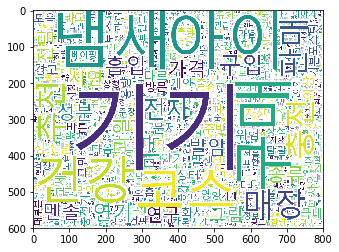

In [24]:
w1=WordCloud(font_path = 'C:\\windows\\Fonts\\malgun.ttf', width=800,height=600,mode='RGBA',background_color='white',max_words=2000).fit_words(dict_result)

import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(w1)
plt.show()